## 1.Bag of words (Bow)

단어의 등장 순서를 고려하지 않는 빈도수 기반의 단어 표현 방법
1. 각 단어의 고유한 정수 인덱스를 부여
2. 각 인덱스 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만든다.

doc1 = 'John likes to watch movies. Mary likes movies too'  
Bow1 = {"Jonh" : 1, "likes" :2, "to" : 1, "watch" :1, "movies" : 2, "Mary" : 1, "too" : 1}

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 45.1 MB/s 


In [ ]:
from konlpy.tag import Okt
import re

okt = Okt()

# 정규표현식을 통해 온점을 제거하는 정제 작업
token = re.sub("(\.)", "", "소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.")
print(token)

token = okt.morphs(token)

소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다


In [ ]:
token

['소비자', '는', '주로', '소비', '하는', '상품', '을', '기준', '으로', '물가상승률', '을', '느낀다']

In [ ]:
# 함수로 직접 bow tokenizer 구현

word2index = {}
bow = []

for voca in token:
    if voca not in word2index.keys():
        word2index[voca] = len(word2index)
        # token을 읽으면서, word2index에 없는 단어는 새로 추가하고, 이미 있는 단어는 넘긴다.
        bow.insert(len(word2index)-1, 1)
        # bow전체에 전부 기본값을 1을 넣어준다. 단어갯수는 최소 1개 이상이기 때문에
    else:
        index = word2index.get(voca)
        # 재 등장하는 단어의 인덱스를 받아오기
        bow[index] = bow[index]+1
        # 재 등장하는 단어는 해당하는 인덱스의 위치에 1을 더해줌. (단어 갯수를 세는 것)

print(word2index)

{'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}


In [ ]:
bow

[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]

### tensorflow의 keras Tokenizer를 활용한 BOW

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
sentence = ["John likes to watch movies. \
            Mary likes movies too! \
            Mary also likes to watch football games."]

In [ ]:
# .word_counts 이용하여 bow tokenizer 구현

def print_bow(sentence):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentence)
    bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장

    print("Bag of words : ", bow)
    print("단어장(vocabulary)의 크기 :", len(tokenizer.word_counts)) # 중복을 제거한 단어들의 갯수

In [ ]:
print_bow(sentence)

Bag of words :  {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(vocabulary)의 크기 : 10


## scikit-learn의 CountVectorizer을 활용한 Bow

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sentence = ["John likes to watch movies. \
            Mary likes movies too! \
            Mary also likes to watch football games."]

In [ ]:
vector = CountVectorizer()

In [ ]:
print("Bag of words : ", vector.fit_transform(sentence).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록
print("각 단어의 인덱스 :", vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되는지를 보여줌

Bag of words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


# 1-1.불용어를 제거한 BOW만들기

## 사용자가 직접 정의한 불용어 사용

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["Family is not an important thing. It's everything"]

vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])

print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


## CountVectorizer에서 제공하는 자체 불용어 사용

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["Family is not an important thing. It's everything"]

vect = CountVectorizer(stop_words="english")

print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


## NLTK에서 지원하는 불용어 사용

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text = ["Family is not an important thing. It's everything"]

sw = stopwords.words("english") # nltk 안에 자체 정의한 불용어

vect = CountVectorizer(stop_words = sw)

print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

# 2.DTM (Document-Term-Matrix)

다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것  
다수의 문서에 대해서 Bow를 하나의 행렬로 표현하고 부르는 용어

- 문서 1 : I like dog
- 문서 2 : I like cat
- 문서 3 : I like cat I like cat

In [ ]:
import pandas as pd
content = [[0, 1, 1, 1], [1, 0, 1, 1], [2, 0, 2, 2]]
df = pd.DataFrame(content)
df.index = ['(문서1) I like dog', '(문서2) I like cat', '(문서3) I like cat I like cat']
df.columns = ['cat', 'dog', 'I', 'like']
df

cat  dog  I  like
(문서1) I like dog               0    1  1     1
(문서2) I like cat               1    0  1     1
(문서3) I like cat I like cat    2    0  2     2

In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [ ]:
doc1 = np.array([0, 1, 1, 1])
doc2 = np.array([1, 0, 1, 1])
doc3 = np.array([2, 0, 2, 2])

In [ ]:
def cos_sim(A, B):
    return dot(A, B)/ (norm(A) * norm(B))
# 코사인 유사도는 0~1사이의 값을 가지고, 1에 가까울 수록 유사도가 높다고 판단

In [ ]:
print(cos_sim(doc1, doc2))
print(cos_sim(doc1, doc3))
print(cos_sim(doc2, doc3))

0.6666666666666667
0.6666666666666667
1.0000000000000002


## Scikit-learn CountVectorizer를 활용한 DTM 구현

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
          'John likes to watch movies',
          'Mary likes movies too',
          'Mary also likes to watch football games'
]

vector = CountVectorizer()
# 문서별 (빈도수)
print(vector.fit_transform(corpus).toarray()) #List(리스트)를 Array(배열)로 변경할 때 사용하는 메서드
# 단어장 생성(인덱스 와 단어)
print(vector.vocabulary_)

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


# 3.TF-IDF (Term-Frequency-Inverse Document Frequency)

모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하고, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단하는 것

In [ ]:
from math import log
import pandas as pd

docs = [
        'John likes to watch movies and Mary likes movies too',
        'James likes to watch TV',
        'Mary also likes to watch football games'
]

In [ ]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

print("단어장 크기 : ", len(vocab))
print(vocab)

단어장 크기 :  13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [ ]:
N = len(docs)
N

3

1. tf(d, t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수
2. df(t) : 특정 단어 t가 등장한 문서의 수
3. idf(d,t) : df(t)에 반비례하는 수

$$ idf(d, t) = log\frac{n}{1+df(t)}$$

In [ ]:
def tf(t, d): # 특정 문서 d에서의 특정 단어 t의 등장 횟수
    return d.count(t)

def idf(t):
    df = 0 # 특정 단어 t가 등장한 문서의 수
    for doc in docs:
        df += t in doc
    return log(N/(df+1))+1

def tfidf(t, d):
    return tf(t,d) * idf(t)

In [ ]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tf(t,d))
        # print("result", result)

tf_ = pd.DataFrame(result, columns=vocab)
tf_

result [[0]]
result [[0, 1]]
result [[0, 1, 1]]
result [[0, 1, 1, 0]]
result [[0, 1, 1, 0, 0]]
result [[0, 1, 1, 0, 0, 1]]
result [[0, 1, 1, 0, 0, 1, 0]]
result [[0, 1, 1, 0, 0, 1, 0, 0]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2, 2]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1], [1]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1], [1, 0]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1], [1, 0, 0]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1], [1, 0, 0, 1]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1], [1, 0, 0, 1, 0]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1], [1, 0, 0, 1, 0, 0]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1], [1, 0, 0, 1, 0, 0, 0]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1], [1, 0, 0, 1, 0, 0, 0, 0]]
result [[0, 1, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1], [1, 0, 0, 1, 0, 0, 0, 0, 1]]
res

James  John  Mary  TV  also  and  football  games  likes  movies  to  too  \
0      0     1     1   0     0    1         0      0      2       2   2    1   
1      1     0     0   1     0    0         0      0      1       0   1    0   
2      0     0     1   0     1    0         1      1      1       0   1    0   

   watch  
0      1  
1      1  
2      1

In [ ]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))
# 단어의 중요도
idf_ = pd.DataFrame(result, index=vocab, columns=['IDF'])
idf_

IDF
James     1.405465
John      1.405465
Mary      1.000000
TV        1.405465
also      1.405465
and       1.405465
football  1.405465
games     1.405465
likes     0.712318
movies    1.405465
to        0.712318
too       1.405465
watch     0.712318

In [ ]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]

        result[-1].append(tfidf(t,d))
# 문장별로 단어의 중요도 표시
tfidf_ = pd.DataFrame(result, columns=vocab)
tfidf_

James      John  Mary        TV      also       and  football     games  \
0  0.000000  1.405465   1.0  0.000000  0.000000  1.405465  0.000000  0.000000   
1  1.405465  0.000000   0.0  1.405465  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000   1.0  0.000000  1.405465  0.000000  1.405465  1.405465   

      likes   movies        to       too     watch  
0  1.424636  2.81093  1.424636  1.405465  0.712318  
1  0.712318  0.00000  0.712318  0.000000  0.712318  
2  0.712318  0.00000  0.712318  0.000000  0.712318

```
'0 : John likes to watch movies and Mary likes movies too',
'1 :James likes to watch TV',
'2 : Mary also likes to watch football games',
```

## scikit-learn을 활용한 TF-IDF 구현

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus = [
          'you know I want your love',
          'I like you',
          'what should I do'
]

vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)
# 여기까진 다를거 없음

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [ ]:
import pandas as pd

# 각 문서에서의 빈도수 시각화
vector = CountVectorizer()
data = vector.fit_transform(corpus).toarray()
index = ['0', '1', '2']
columns = ['do', 'know', 'like', 'love', 'should', 'want', 'what', 'you', 'your']

df = pd.DataFrame(data=data,
                         columns=['do', 'know', 'like', 'love', 'should', 'want', 'what', 'you', 'your'],
                         index=['0', '1', '2'])
df

do  know  like  love  should  want  what  you  your
0   0     1     0     1       0     1     0    1     1
1   0     0     1     0       0     0     0    1     0
2   1     0     0     0       1     0     1    0     0

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #단어 카운트 가중치

In [ ]:
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]


In [ ]:
print(tfidfv.vocabulary_)

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [ ]:
from sklearn.utils.validation import column_or_1d
import pandas as pd

# 각 문서에서의 TF-IDF 시각화
data = tfidfv.transform(corpus).toarray()
index = ['0', '1', '2']
columns = ['do', 'know', 'like', 'love', 'should', 'want', 'what', 'you', 'your']

df_tfidfv = pd.DataFrame(data=data,
                         columns=['do', 'know', 'like', 'love', 'should', 'want', 'what', 'you', 'your'],
                         index=['0', '1', '2'])
df_tfidfv

do      know      like      love   should      want     what  \
0  0.00000  0.467351  0.000000  0.467351  0.00000  0.467351  0.00000   
1  0.00000  0.000000  0.795961  0.000000  0.00000  0.000000  0.00000   
2  0.57735  0.000000  0.000000  0.000000  0.57735  0.000000  0.57735   

        you      your  
0  0.355432  0.467351  
1  0.605349  0.000000  
2  0.000000  0.000000

# 로이터 데이터로 TF-IDF학습하기

In [ ]:
from tensorflow.keras.datasets import reuters

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
print('훈련 샘플의 수 : {}'.format(len(x_train)))
print('테스트 샘플의 수 : {}'.format(len(x_test)))

훈련 샘플의 수 : 8982
테스트 샘플의 수 : 2246


In [ ]:
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

카테고리 : 46


In [ ]:
print('첫 번째 훈련용 뉴스 기사 : ',x_train[0]) #문장 별 인코딩된 리스트
print('첫 번째 뉴스 기사의 레이블 :', y_train[0])
print('첫 번째 테스트용 뉴스 기사 : ',x_test[0])
print('첫 번째 테스트용 뉴스 기사의 레이블 :', y_train[0])

첫 번째 훈련용 뉴스 기사 :  [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
첫 번째 뉴스 기사의 레이블 : 3
첫 번째 테스트용 뉴스 기사 :  [1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 

뉴스 기사의 최대 길이 : 2376
뉴스 기사의 평균 길이 : 145.5398574927633


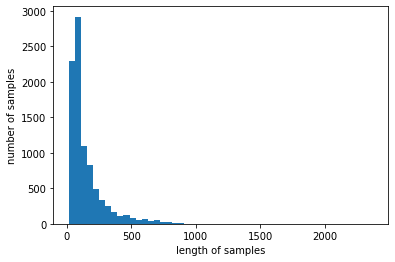

In [ ]:
print('뉴스 기사의 최대 길이 : {}'.format(max(len(sample) for sample in x_train)))
print('뉴스 기사의 평균 길이 : {}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(sample) for sample in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


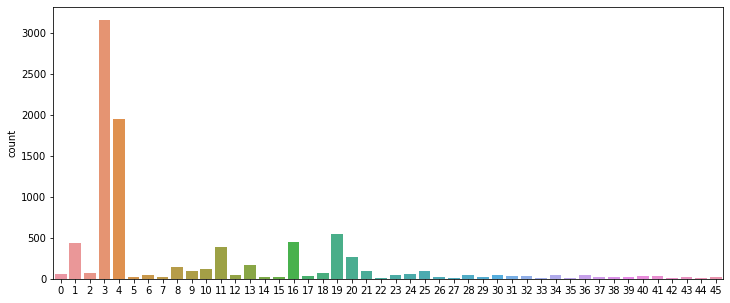

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 5)
sns.countplot(y_train)

In [ ]:
# 정렬 된 고유 값 배열의 튜플과 입력 배열에 각 고유 값의 개수 배열을 제공합니다.
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수 : ")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수 : 
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [ ]:
word_to_index = reuters.get_word_index()
print(word_to_index)

565248/550378 [==============================] - 0s 0us/step
{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 162

In [ ]:
# 키와 값의 위치를 바꿔보자
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key  #토큰이 3개 더 들어가 있기 때문에 3을 더해줌
# 이로써 인덱스로 값을 검색 할 수 있다
index_to_word

{10999: 'mdbl',
 16263: 'fawc',
 12092: 'degussa',
 8806: 'woods',
 13799: 'hanging',
 20675: 'localized',
 20676: 'sation',
 20678: 'chanthaburi',
 11000: 'refunding',
 8807: 'hermann',
 20679: 'passsengers',
 20680: 'stipulate',
 8355: 'heublein',
 20716: 'screaming',
 16264: 'tcby',
 188: 'four',
 1645: 'grains',
 20683: 'broiler',
 12093: 'wooden',
 1223: 'wednesday',
 13800: 'highveld',
 7596: 'duffour',
 20684: '0053',
 3917: 'elections',
 2566: '270',
 3554: '271',
 5116: '272',
 3555: '273',
 3403: '274',
 7978: 'rudman',
 3404: '276',
 3481: '277',
 3635: '278',
 4312: '279',
 9384: 'dormancy',
 7250: 'errors',
 3089: 'deferred',
 20686: 'sptnd',
 8808: 'cooking',
 20687: 'stratabit',
 16265: 'designing',
 20688: 'metalurgicos',
 13801: 'databank',
 20689: '300er',
 20690: 'shocks',
 7975: 'nawg',
 20691: 'tnta',
 20692: 'perforations',
 2894: 'affiliates',
 20693: '27p',
 16266: 'ching',
 598: 'china',
 16267: 'wagyu',
 3192: 'affiliated',
 16268: 'chino',
 16269: 'chinh',
 2

In [ ]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[4]))

빈도수 상위 1번 단어 : the


In [ ]:
print('빈도수 상위 4856번 단어 : {}'.format(index_to_word[4859]))

빈도수 상위 4856번 단어 : independence


In [ ]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token
    print(index_to_word)
# 복원
print(' '.join([index_to_word[index] for index in x_train[0]]))

{10999: 'mdbl', 16263: 'fawc', 12092: 'degussa', 8806: 'woods', 13799: 'hanging', 20675: 'localized', 20676: 'sation', 20678: 'chanthaburi', 11000: 'refunding', 8807: 'hermann', 20679: 'passsengers', 20680: 'stipulate', 8355: 'heublein', 20716: 'screaming', 16264: 'tcby', 188: 'four', 1645: 'grains', 20683: 'broiler', 12093: 'wooden', 1223: 'wednesday', 13800: 'highveld', 7596: 'duffour', 20684: '0053', 3917: 'elections', 2566: '270', 3554: '271', 5116: '272', 3555: '273', 3403: '274', 7978: 'rudman', 3404: '276', 3481: '277', 3635: '278', 4312: '279', 9384: 'dormancy', 7250: 'errors', 3089: 'deferred', 20686: 'sptnd', 8808: 'cooking', 20687: 'stratabit', 16265: 'designing', 20688: 'metalurgicos', 13801: 'databank', 20689: '300er', 20690: 'shocks', 7975: 'nawg', 20691: 'tnta', 20692: 'perforations', 2894: 'affiliates', 20693: '27p', 16266: 'ching', 598: 'china', 16267: 'wagyu', 3192: 'affiliated', 16268: 'chino', 16269: 'chinh', 20695: 'slickline', 13802: 'doldrums', 12095: 'kids', 303

KeyError: ignored

In [ ]:
# 전체 훈련 데이터에 대해서 decoded
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [ ]:
# 전체 테스트 데이터에 대해서 decoded
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [ ]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [ ]:
x_test[:5]

## TF-IDF로 로이터 데이터 학습

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer # Bag of Words
from sklearn.feature_extraction.text import TfidfTransformer # TF-IDF values
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train) # DTM완성
print("x_train_counts \n", x_train_counts)
print()

tfidf_transformer = TfidfTransformer() #단어 카운트 가중치
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
print("x_train_tfidf \n", x_train_tfidf)

x_train_counts 
   (0, 8272)	1
  (0, 9181)	2
  (0, 7834)	3
  (0, 1677)	1
  (0, 7633)	1
  (0, 6365)	3
  (0, 5223)	1
  (0, 3143)	1
  (0, 1233)	1
  (0, 8303)	1
  (0, 2565)	1
  (0, 5213)	2
  (0, 3945)	1
  (0, 3608)	1
  (0, 6682)	3
  (0, 8055)	3
  (0, 4945)	3
  (0, 249)	1
  (0, 172)	1
  (0, 8932)	6
  (0, 383)	1
  (0, 3475)	6
  (0, 9218)	1
  (0, 4325)	3
  (0, 828)	1
  :	:
  (8981, 4219)	1
  (8981, 1863)	1
  (8981, 1590)	1
  (8981, 1261)	1
  (8981, 9246)	1
  (8981, 5025)	1
  (8981, 1837)	1
  (8981, 2191)	2
  (8981, 5451)	1
  (8981, 7489)	1
  (8981, 1573)	1
  (8981, 4941)	1
  (8981, 6117)	1
  (8981, 5183)	1
  (8981, 7852)	1
  (8981, 8153)	1
  (8981, 4024)	1
  (8981, 3909)	1
  (8981, 1315)	1
  (8981, 2358)	1
  (8981, 6081)	2
  (8981, 5418)	1
  (8981, 9133)	1
  (8981, 9594)	1
  (8981, 7294)	1

x_train_tfidf 
   (0, 9628)	0.06356670958147888
  (0, 9218)	0.08780620595054514
  (0, 9181)	0.08604864459739914
  (0, 8932)	0.25028101697583904
  (0, 8890)	0.0930998381922142
  (0, 8875)	0.0767236648312991

In [ ]:
# 나이브 베이즈 분류기 수행 (머신러닝)
# x_train TF-IDF의 벡터, y_train 레이블
clf = MultinomialNB().fit(x_train_tfidf, y_train)

In [ ]:
# 입력 데이터는 TF-IDF 처리 후 입력
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data) 
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [ ]:
x_test_tfidf = tfidf_vectorizer(x_test)
x_test_tfidf

<2246x9670 sparse matrix of type '<class 'numpy.float64'>'
	with 174484 stored elements in Compressed Sparse Row format>

In [ ]:
y_pred = clf.predict(x_test_tfidf)
y_pred

array([3, 4, 4, ..., 3, 4, 1])

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LSTM 모델로 로이터 데이터 학습하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
from tensorflow.keras.datasets import reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
print(x_train)

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13, 4, 346, 48, 235, 62

In [6]:
print(type(x_train[0]))
print(x_train.shape)

<class 'list'>
(8982,)


In [9]:
print(y_train.shape)
print(len(y_train))

(8982,)
8982


In [10]:
# x_train: TF-IDF 인코딩 -> 패딩 설정
# y_train: 원핫인코딩

In [11]:
max_len = 100
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
len(y_train)
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
vocab_size = 1000
embedding_dim = 128
hidden_units = 128
num_classes = 46

abc = Sequential()
abc.add(Embedding(vocab_size, embedding_dim))
abc.add(LSTM(hidden_units))
abc.add(Dense(num_classes, activation='softmax'))
abc.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         128000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 46)                5934      
                                                                 
Total params: 265,518
Trainable params: 265,518
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='max', verbose=1, save_best_only=True)

In [ ]:
abc.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = abc.fit(x_train, y_train, batch_size=128, epochs = 100, callbacks=[es, mc], validation_data=(x_test, y_test))

Epoch 1/100
70/71 [============================>.] - ETA: 0s - loss: 2.6020 - acc: 0.3398

KeyboardInterrupt: ignored

In [ ]:
loaded_model = load_model('best_model.h5')
print('\n 테스트 정확도 : %.4f'% (loaded_model.evaluate(x_test, y_test)[1]))

In [ ]:
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()